# Brownian motion

Een van de bekendste voorbeelden van botsende deeltjes in de natuur is Brownian motion.
Fijn gemalen pollen in water lijken te dansen in willekeurige richting.
Dit komt doordat de pollen worden geraakt door watermoleculen die in alle richtingen bewegen.
Omdat de pollen veel zwaarder zijn dan watermoleculen, dus de beweging van de pollen is veel langzamer en minder "intens" dan die van de watermoleculen.
Dit proces van willekeurige beweging door botsingen met kleinere deeltjes wordt Brownian motion genoemd en kunnen we simuleren op basis van ons (premature) botsingsmodel.
Daarbij kunnen we ook gebruik maken van de zojuist geleerde manier van tracking van deeltjes, waarbij we een zowel het zware bolletjes als een enkel deeltje kunnen volgen.

Let op!
We bestuderen hier nog geen thermische effecten, deze opdrachten zijn met name bedoeld om beter te begrijpen hoe het botsingsmodel in elkaar zit.

```{warning}
In dit notebook zitten delen waar ruimte is om code toe te voegen, maar waarbij je denkt... waarom dan?
In een latere opdracht moet je terug naar die cell en de juiste code toevoegen.
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Maken van de ParticleClass

class ParticleClass:
    # Het maken van het deeltje
    def __init__(self, m, v, r, R, c):
        self.m = m                         
        self.v = np.array(v, dtype=float)  
        self.r = np.array(r, dtype=float)  
        self.R = np.array(R, dtype=float)  
        self.c = c

    # Het updaten van de positie, eventueel met zwaartekracht
    def update_position(self):
        self.r += self.v * dt #+ 1/2 * a * dt**2  
              
    # Harde wand
    def boxcollision(self):
        if abs(self.r[0]) + self.R > Box_length: 
            self.v[0] = -self.v[0]                                  # Omdraaien van de snelheid
            self.r[0] = np.sign(self.r[0]) * (Box_length - self.R)  # Zet terug net binnen box                 
        if abs(self.r[1]) + self.R > Box_length: 
            self.v[1] = -self.v[1]     
            self.r[1] = np.sign(self.r[1]) * (Box_length - self.R) 
            
    @property
    def momentum(self):
        return self.m * self.v
    
    @property
    def kin_energy(self):
        return 1/2 * self.m * np.dot(self.v, self.v)

In [3]:
# Aanmaken van de randvoorwaarden en initiele condities
Box_size_0 = 10
Box_length_0 = Box_size_0/2
Box_length = Box_length_0     # De grootte van de box kan wijzigen!

# Particles
dt = 0.1
particles = []
N = 40
v_0 = 1

dt = 0.04

# Aanmaken van deeltjes
for i in range(N-1):
    vx = np.random.uniform(-v_0,v_0)
    vy = np.random.choice([-1, 1])*np.sqrt(v_0**2-vx**2)        
    pos = Box_length_0*np.random.uniform(-1,1,2)
    particles.append(ParticleClass(m=1.0, v=[vx, vy], r = pos, R=.5,c='blue')) 

particles.append(ParticleClass(m=20.0, v=[0, 0], r = [0, 0], R=.5,c='red')) 


```{exercise} Brownian motion
:label: ex-brownian-1

Leg uit wat er in de laatste regel van bovenstaande script gebeurt.
Voeg voor deze regel goede metadata toe.
```
 
```{solution} ex-brownian-1
De laatste regel voegt het brownse deeltjes toe aan. Het code in het algemeen probeert de deeltjes een willekeurige richting te geven met dezelfde snelheid.

De massa (20) is veel zwaarder dan de massa van deeltjes van water.

v=[0,0] is het begin snelheid

De kleur rood is gekozen om de deeltjes te scheiden van de blauw water moleculen. 

Er is een doos vol met deeltjes op willekeurige positie aangemaakt.
We willen kijken waar de deeltjes zijn terechtgekomen.
Hieronder staat dit weergegeven. 



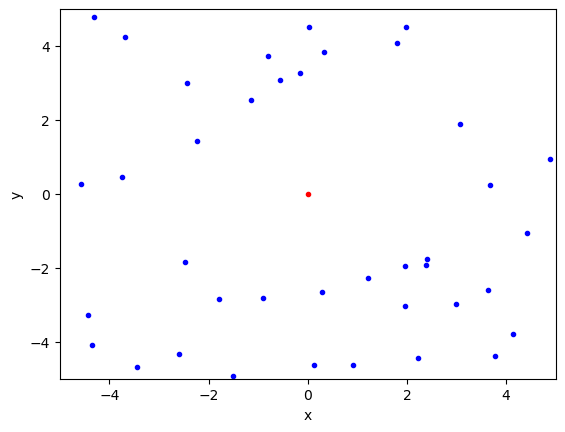

In [4]:
# Inspecteren van beginsituatie
plt.figure()

plt.xlabel('x')
plt.ylabel('y')

plt.xlim(-Box_length_0,Box_length_0)
plt.ylim(-Box_length_0,Box_length_0)


for particle, particle_object in enumerate(particles):
    plt.plot(particle_object.r[0],particle_object.r[1],color=particle_object.c,marker='.')
    # plt.arrow(particle_object.r[0],particle_object.r[1], 
    #           particle_object.v[0],particle_object.v[1], 
    #           head_width=0.05, head_length=0.1, color='red')
plt.show()


```{exercise} 
:label: ex-brownian-2

Er staat ook code met comments ervoor, wat doet deze code? 
Check je antwoord door de comments weg te halen.
Hoe wordt er voor gezorgd dat de snelheid van elk deeltje gelijk is?
```
  
```{solution} ex-brownian-2

In het algemeen lijkt een 'arrow' op een vector. Dus op basis daarvan kunnen we zeggen dat de code plt.arrow(......) een vector is. Dus de code wordt gebruikt om de snelheidsvectoren van de deeltjes op kaartje te brengen of visualiseren.

Zonder de commentaar zal de plot aantonen in welke richting de deeljes bewegen en hoe snel ze bewegen, inclusief hun positie.  

Over de uniforme snelheid, de stelling van pythagoras was gebruikt om de snelheid in de y richting te berekenen. Dit zorgt ervoor dat elke deelje de grootte van de snelheidsvector precies de dezelfde snelheid (V_0) overal.

We gaan nu de functies van de simulatie weer aanroepen:

In [7]:
# Het bepalen of er een botsing plaats vindt
def collide_detection(self, other):
    dx = self.r[0] - other.r[0]
    dy = self.r[1] - other.r[1]
    rr = self.R + other.R
    return  dx**2+dy**2 < rr**2 
        
def particle_collision(p1: ParticleClass, p2: ParticleClass):
    """ past snelheden aan uitgaande van overlap """
    m1, m2 = p1.m, p2.m
    delta_r = p1.r - p2.r
    delta_v = p1.v - p2.v
    dot_product = np.dot(delta_r, delta_v)
    
    # Als deeltjes van elkaar weg bewegen dan geen botsing
    if dot_product >= 0: # '='-teken voorkomt ook problemen als delta_r == \vec{0}
        return
    
    distance_squared = np.dot(delta_r, delta_r) 
    # Botsing oplossen volgens elastische botsing in 2D
    p1.v -= 2 * m2 / (m1 + m2) * dot_product / distance_squared * delta_r
    p2.v += 2 * m1 / (m1 + m2) * dot_product / distance_squared * delta_r

def handle_collisions(particles):


    """ alle onderlinge botsingen afhandelen voor deeltjes in lijst """
    num_particles = len(particles)
    for i in range(num_particles):
        for j in range(i+1, num_particles):
            if collide_detection(particles[i], particles[j]):
                particle_collision(particles[i], particles[j])
#your code/answer



In onderstaande code geven we de code voor de simulatie en volgen we de positie van het zware deeltje. 

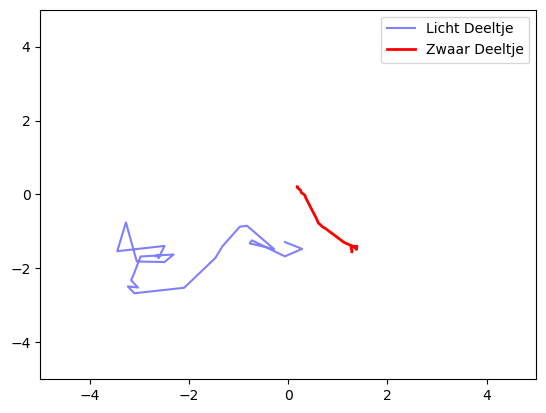

In [9]:
# tracken van het zware deeltje
#De onderstaande code is een lege lijsten aangemaakt voor de lichte deeltje en het zware deeltje.
track_x_heavy =[]
track_y_heavy =[]
track_x_light =[]
track_y_light =[]



for i in range(400):
    # 1. Update posities en check muren
    
    for p in particles:
        p.update_position()    # Update positie        
        p.boxcollision()         # Wandbotsing werkt per deeltje
    # 2. Botsingen afhandelen (Roep de functie aan die in het notebook staat)    
    handle_collisions(particles)

    # 3.Posities opslaan voor tracking
    #Zwaar deeltjes (De laatste in de lijst, index N-1 of -1)
    
    track_x_heavy.append(particles[N-1].r[0])
    track_y_heavy.append(particles[N-1].r[1])

    #Licht deeltjes (De eerste in de lijst, index 0)
    track_x_light.append(particles[0].r[0])
    track_y_light.append(particles[0].r[1])
    

plt.figure()
plt.plot(track_x_light,track_y_light,'b-', label='Licht Deeltje',alpha=0.5)
plt.plot(track_x_heavy, track_y_heavy,'r-', label='Zwaar Deeltje',linewidth=2)
plt.xlim(-Box_length,Box_length)
plt.ylim(-Box_length, Box_length)
plt.legend()
plt.show()


# Er is geen rode lijn op het grafiek te zien doordat de deeltje heel zwaar (20X) is en begint vanaf stilstaand. Dus er moet veel botsingen plaatsvinden om op gang te komen. Bovendien is 400 tijdstappen niet ver genoeg.

```{exercise} Brownian motion in beeld
:label: ex-brownian-3
- Draai de onderstaande simulatie een keer en bestudeer de output.
- Voeg zelf een tweede tracking toe van een licht deeltje en verbeter de plot.
- Wat zijn overeenkomsten en verschillen tussen de beweging van de twee deeltjes?
- Wat valt je op als je de simulatie een aantal keer runt?
```

```{solution} ex-brownian-3
# De handle_collisions of particle_collision moet aangepast worden zodat het slechts een resultaat geeft als er botsing plaatsvindt. Dus gebruik maken van True.

#Een variabele collision_count =0 moet geinitaliseerd worden binnen de hoofd-tijdloop

#Verhoging van de teller elke keer dat particle_collision effectief .

#Sla dit aantal op in een lijst collisions_per_step en plot dit tegen de tijd. 

```

We zouden gevoel willen krijgen voor het aantal botsingen dat per tijdseenheid plaatsvindt. 
Elke keer dat er een botsing plaatsvindt, zou de counter met 1 omhoog moeten gaan.
Idealiter wordt het aantal botsingen opgeslagen in een array zodat je het aantal botsingen als functie van de tijd kunt weergeven.

```{exercise}
Pas bovenstaand idee toe in de eerder gemaakte code.
Plot hieronder het aantal botsingen als functie van de tijd.
```

In [10]:
def particle_collision(p1: ParticleClass, p2: ParticleClass):
    """ Past snelheden aan en retourneert True als er een botsing was """
    m1, m2 = p1.m, p2.m
    delta_r = p1.r - p2.r
    delta_v = p1.v - p2.v
    dot_product = np.dot(delta_r, delta_v)
    
    # Als deeltjes van elkaar weg bewegen dan geen botsing (ondanks overlap)
    if dot_product >= 0: 
        return False
    
    distance_squared = np.dot(delta_r, delta_r) 
    # Botsing oplossen volgens elastische botsing in 2D
    p1.v -= 2 * m2 / (m1 + m2) * dot_product / distance_squared * delta_r
    p2.v += 2 * m1 / (m1 + m2) * dot_product / distance_squared * delta_r
    
    return True # Er was een botsing!

def handle_collisions(particles):
    """ Handelt botsingen af en geeft het totaal aantal botsingen terug """
    step_collisions = 0
    num_particles = len(particles)
    
    for i in range(num_particles):
        for j in range(i+1, num_particles):
            if collide_detection(particles[i], particles[j]):
                # Tel alleen als er echt een botsing (snelheidsverandering) is
                if particle_collision(particles[i], particles[j]):
                    step_collisions += 1
                    
    return step_collisions

In [ ]:
# Lijst om het aantal botsingen per tijdstap op te slaan
collisions_history = []

for i in range(1000): # Of het aantal stappen dat je hebt gekozen
    
    # 1. Update posities
    for p in particles:
        p.update_position()    
        p.boxcollision()         
        
    # 2. Handel botsingen af EN sla het aantal op
    # De functie geeft nu een getal terug (bijv. 0, 1, of 5 botsingen in deze stap)
    aantal_botsingen = handle_collisions(particles)
    collisions_history.append(aantal_botsingen)
    

    # 3.Posities opslaan voor tracking
    #Zwaar deeltjes (De laatste in de lijst, index N-1 of -1)
    
    track_x_heavy.append(particles[N-1].r[0])
    track_y_heavy.append(particles[N-1].r[1])

    #Licht deeltjes (De eerste in de lijst, index 0)
    track_x_light.append(particles[0].r[0])
    track_y_light.append(particles[0].r[1])
    


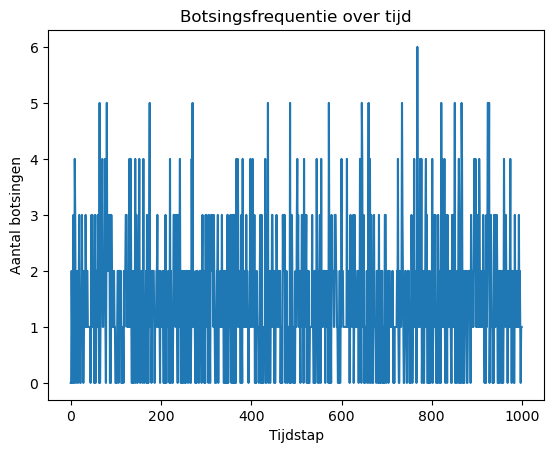

In [ ]:
plt.figure()
plt.plot(collisions_history)
plt.xlabel('Tijdstap')
plt.ylabel('Aantal botsingen')
plt.title('Botsingsfrequentie over tijd')
plt.show()

```{warning} 🌶 Let op!
:icon: false
De onderstaande opdrachten vallen buiten de stof maar tellen mee als je excellent wilt behalen.
```

In zulke fysica modellen is de afgelegde weg (afstand tussen begin en eindpunt) van belang.
Deze afgelegde weg zegt iets over de snelheid van difussie.
Idealiter bekijken we een histogram.
Maar voor een histogram hebben we veel deeltjes nodig.



```{exercise} Afgelegde weg 🌶
:label: ex-brownian-4

- Maak een simulatie met 361 deeltjes, waarvan 1 zwaar deeltje.
- Houd rekening met de boxgrootte, deze moet mee schalen!
- Maak een histogram van de afgelegde weg voor alle deeltjes. 
- Geef de afgelegde weg van het grote deeltje duidelijk aan.
```


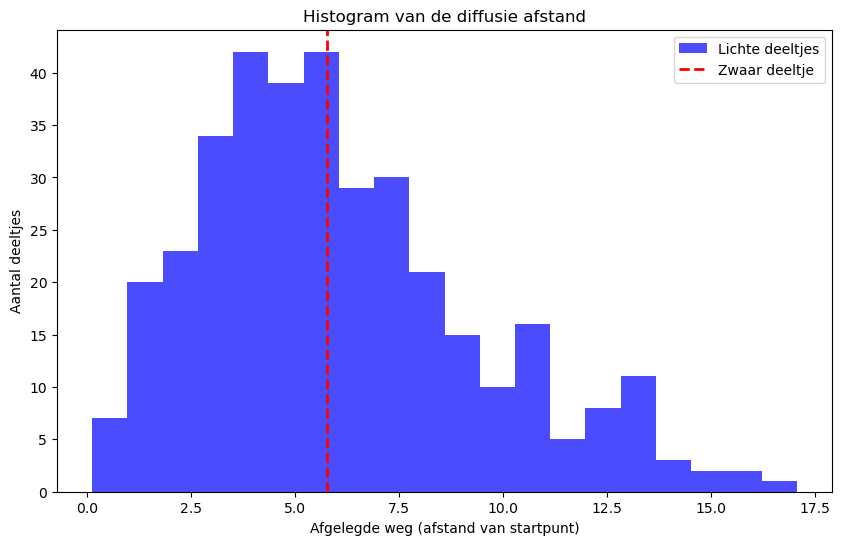

Het zware deeltje heeft een afstand van 5.76 afgelegd.


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Instellingen
N = 361
Box_size_0 = 30  # Box 3x groter gemaakt (was 10)
Box_length = Box_size_0 / 2
v_0 = 1
dt = 0.04
steps = 1000

particles = []

# 2. Deeltjes aanmaken
# We maken N-1 lichte deeltjes
for i in range(N-1):
    vx = np.random.uniform(-v_0, v_0)
    vy = np.random.choice([-1, 1]) * np.sqrt(v_0**2 - vx**2)        
    pos = Box_length * np.random.uniform(-1, 1, 2)
    particles.append(ParticleClass(m=1.0, v=[vx, vy], r=pos, R=.5, c='blue')) 

# 1 zwaar deeltje toevoegen (Rood)
particles.append(ParticleClass(m=20.0, v=[0, 0], r=[0, 0], R=.5, c='red')) 

# 3. Startposities opslaan om later de afstand te berekenen
start_positions = [np.copy(p.r) for p in particles]

# 4. Simulatie runnen
for step in range(steps):
    for p in particles:
        p.update_position()
        p.boxcollision()
    handle_collisions(particles)

# 5. Afstanden berekenen (Stelling van Pythagoras tussen start en eind)
distances = []
for i, p in enumerate(particles):
    d = np.linalg.norm(p.r - start_positions[i]) # Afstand formule
    distances.append(d)

# 6. Plotten
plt.figure(figsize=(10, 6))

# Histogram van alle lichte deeltjes (alles behalve de laatste)
plt.hist(distances[:-1], bins=20, alpha=0.7, label='Lichte deeltjes', color='blue')

# Verticale lijn voor het zware deeltje
dist_heavy = distances[-1]
plt.axvline(dist_heavy, color='red', linestyle='dashed', linewidth=2, label='Zwaar deeltje')

plt.xlabel('Afgelegde weg (afstand van startpunt)')
plt.ylabel('Aantal deeltjes')
plt.title('Histogram van de diffusie afstand')
plt.legend()
plt.show()

print(f"Het zware deeltje heeft een afstand van {dist_heavy:.2f} afgelegd.")


Interpretatie: 

Het histogram hierboven toont aan hoe ver de deeltjes na een bepaalde tijd van hun startpunt verwijderd zijn. De spreiding in afstanden is een indicatie dat niet alle deeltjes even ver komen en dat diffusie dus een statistisch proces is.

De rode stippellijn geeft aan waar de zware deeltjes zich gemiddeld bevinden. Uit de grafiek is af te leiden dat massa voor traagheid zorgt. Zware deeltjes bieden weerstand tegen verandering; ze willen in hun rustpositie blijven of met een constante snelheid blijven bewegen. Een verandering in hun richting en snelheid gaat moeizaam. Kortom: de diffusiesnelheid is afhankelijk van de massa.


En nu we toch bezig zijn met twee verschillende deeltjes.... 

We kunnen twee "groepen" van deeltjes aanmaken, elk  met een andere massa. Als we dan de zwaartekracht aan zetten, dan zouden we verwachten dat de lichtere deeltjes boven komen "drijven".

```{exercise} Onderzoek dit vermoeden 🌶
- maak daartoe de box 2x zo hoog als breed
- verdubbel het totaal aantal deeltjes
- zet een artificieel grote zwaartekracht aan
```

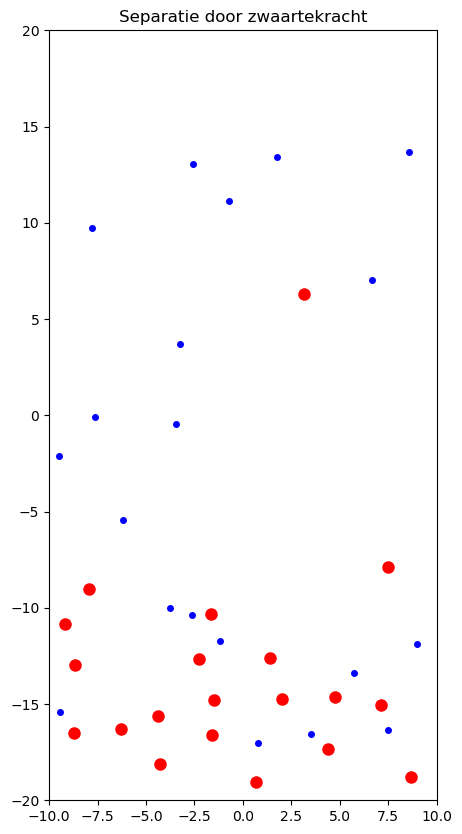

In [14]:
# 1. Update de ParticleClass voor zwaartekracht en niet-vierkante box
class GravityParticle(ParticleClass):
    def update_position(self, g=2.0): # g is de zwaartekracht constante
        # Snelheid update (zwaartekracht werkt op y-as omlaag)
        self.v[1] -= g * dt 
        # Positie update
        self.r += self.v * dt
        
    def boxcollision(self, width, height):
        # X-as botsing (Breedte)
        if abs(self.r[0]) + self.R > width: 
            self.v[0] = -self.v[0]
            self.r[0] = np.sign(self.r[0]) * (width - self.R)
            
        # Y-as botsing (Hoogte)
        if abs(self.r[1]) + self.R > height: 
            self.v[1] = -self.v[1]
            self.r[1] = np.sign(self.r[1]) * (height - self.R)

# 2. Instellingen
Box_width = 10   # Zelfde breedte
Box_height = 20  # 2x zo hoog
N_heavy = 20
N_light = 20
v_0 = 2 # Iets meer energie geven
dt = 0.02 # Iets kleinere tijdstap voor stabiliteit bij zwaartekracht

particles = []

# 3. Deeltjes aanmaken
# Zware deeltjes (Rood, m=10)
for i in range(N_heavy):
    pos = [np.random.uniform(-Box_width+1, Box_width-1), np.random.uniform(-Box_height+1, Box_height-1)]
    particles.append(GravityParticle(m=10.0, v=[0,0], r=pos, R=0.8, c='red')) # Let op: GravityParticle class

# Lichte deeltjes (Blauw, m=1)
for i in range(N_light):
    vx = np.random.uniform(-v_0, v_0)
    vy = np.random.uniform(-v_0, v_0)
    pos = [np.random.uniform(-Box_width+1, Box_width-1), np.random.uniform(-Box_height+1, Box_height-1)]
    particles.append(GravityParticle(m=1.0, v=[vx, vy], r=pos, R=0.5, c='blue'))

# 4. Simulatie
for step in range(1500): # Tijd geven om te 'settlen'
    for p in particles:
        p.update_position(g=1.5) # Zwaartekracht aan!
        p.boxcollision(Box_width, Box_height)
    
    handle_collisions(particles)

# 5. Resultaat plotten
plt.figure(figsize=(5, 10)) # Lange, smalle plot
plt.xlim(-Box_width, Box_width)
plt.ylim(-Box_height, Box_height)
plt.title("Separatie door zwaartekracht")

for p in particles:
    plt.plot(p.r[0], p.r[1], marker='o', color=p.c, markersize=8 if p.m > 5 else 4)

plt.show()



Interpretatie: 


De bovenstaande grafiek toont de doorsnede van de doos onder invloed van zwaartekracht.

Uit de grafiek blijkt dat het merendeel van de zware bollen (rode bollen) zich onder de nul bevindt. Dit is het gevolg van de zwaartekracht. De zwaartekracht trekt harder aan de zware bollen dan dat de thermische botsingen ze omhoog kunnen duwen. De zwaartekracht-energie wint het hier van de kinetische energie, waardoor de rode bollen op de bodem blijven liggen.

Verder is te zien dat de blauwe bollen zich bijna overal bevinden. Omdat deze bollen licht zijn, heeft de zwaartekracht minder vat op ze. Hierdoor is hun thermische energie (snelheid) groot genoeg om de zwaartekracht te overwinnen en door de hele doos te blijven bewegen.